In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.io import loadmat
from random import choices
import copy
from scipy.sparse import issparse
from statistics import mean,stdev
# fileload.py
from fileload import load_matfile
from tqdm import tqdm

## 1. Transform edgelist to Graph

In [ ]:
# import csv
# with open("facebook-links.txt") as rfh:
#     reader = csv.reader(rfh, delimiter="\t")
#     edgelist = list(reader)
# with open('NOLAfacebook.csv', 'w', newline='') as wfh:
#     spamwriter = csv.writer(wfh, delimiter=',')
#     for row in edgelist:
#         spamwriter.writerow([int(row[0]), int(row[1])])

In [ ]:
G_blogcatalog = load_matfile(file_ = "blogcatalog.mat")
assert(G_blogcatalog.number_of_nodes() == 10312)
assert(G_blogcatalog.number_of_edges() == 333983)

## 1.1 cluster size distribution

In [ ]:
def percolate(G, beta, unWeighted=True):
    '''
    Percolate G with probability beta,
    return G with merely percolated edges.
    
    Note: Here we don't consider Directed/Weighted graph 
    
    '''
    edges_percolated = []
    G_percolated = nx.Graph()
    assert(G_percolated.number_of_nodes() == 0)
    numPercolatedEdges = int(beta*G.number_of_edges())
    G_percolated.add_nodes_from(list(G.nodes))
    if unWeighted:
        edges_percolated = choices(list(G.edges), k=numPercolatedEdges)
        assert(len(edges_percolated) ==  numPercolatedEdges)
        G_percolated.add_edges_from(edges_percolated)
#     else:
#         bond percolation probability depends on the edge's weight
    return G_percolated

In [ ]:
def nodes_in_GC(G,beta):
    '''
    return a set of nodes in the percolated Giant Cluster
    '''
    G_percolated = percolate(G,beta)
    largest_cc_nodes = max(nx.connected_components(G_percolated), key=len)
    return largest_cc_nodes

In [34]:
def times_in_GC(G, numIter, beta=0.004):
    '''
    return a dictionary of all nodes with 
    key: node 
    value: list of iterations in which the node is in GC
    '''
    times_in_GC = {n:[] for n in G.nodes()}
    for i in range(numIter):
        for n in nodes_in_GC(G,beta):
            times_in_GC[n].append(i)
    return times_in_GC
numIter = 50
times = sorted({k:len(v) for k,v in times_in_GC(G_blogcatalog,numIter).items()}.items(),key=lambda kv: kv[1])

In [35]:
# 0.005,50
# 0.01, 550
# 0.015,1000
# 0.02, 1500
# 0.03, 2500

[5680, 445, 8156, 4996, 738, 1225, 644, 175, 4838, 2520]

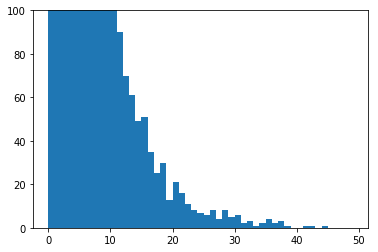

In [36]:
plt.hist([t for n,t in times],log=False,bins = range(numIter))
plt.ylim(0,100)
[n for n,t in times[-10:]]

In [16]:
times[-10:]

[(4651, 47),
 (448, 47),
 (4707, 47),
 (445, 48),
 (4983, 48),
 (7372, 48),
 (738, 48),
 (175, 49),
 (4373, 49),
 (4838, 49)]

list